# X-ray Image Classification (Pre-trained Models)

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf

In [2]:
DataDir = r"/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/train"

In [3]:
CATOGRIES = ["NORMAL", "PNEUMONIA"]

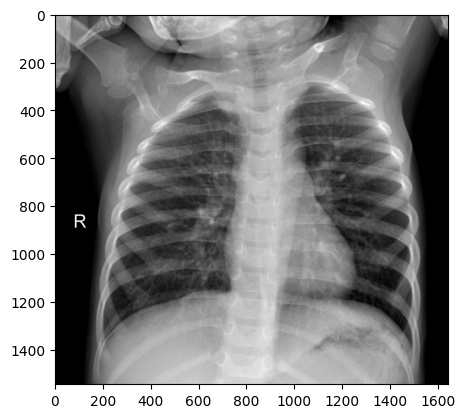

In [4]:
for i in CATOGRIES:
  path = os.path.join(DataDir, i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break
  break

In [5]:
# initilizing the size of the image so that every image should be in same dimesion
img_size = 100

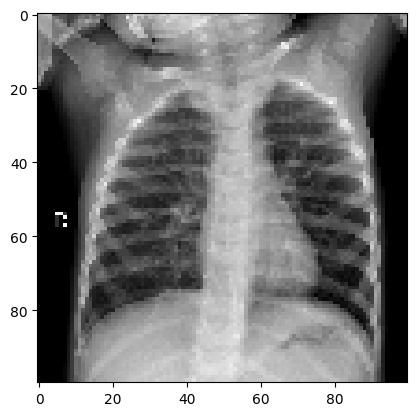

In [6]:
# image after resize and gray scale
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

In [8]:
# defining the funciton for traning data according to the categories converting the image into gray scale with resiizing the into 500 x 500
# convering it intp numpy arrays
def create_training_data():
  for i in CATOGRIES:
    path = os.path.join(DataDir, i)
    class_num = CATOGRIES.index(i)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

In [9]:
create_training_data()

In [10]:
print(len(training_data))

5216


In [11]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
  print(sample)

[array([[76, 81, 82, ..., 74, 82, 60],
       [76, 86, 83, ..., 93, 76, 55],
       [78, 80, 82, ..., 97, 71, 62],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 12, ...,  0,  0,  0]], dtype=uint8), 1]
[array([[ 8, 47, 51, ..., 36, 36, 31],
       [30, 51, 47, ..., 38, 37, 32],
       [39, 52, 46, ..., 38, 36, 31],
       ...,
       [14, 10,  4, ...,  1,  7,  7],
       [15, 10,  5, ...,  1,  6,  7],
       [12,  9,  2, ...,  0,  5,  7]], dtype=uint8), 1]
[array([[  1,   3,   4, ...,  82,  88,  61],
       [  1,   2,   5, ...,  63,  48,  70],
       [  1,   2,  10, ...,  56,  57,  60],
       ...,
       [  9,  20,  31, ...,   0,   0,   0],
       [  6,  17,  21, ...,   0,   0,   0],
       [ 23, 220,  24, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[ 96, 101, 107, ..., 106,  93,  95],
       [ 95, 108, 112, ..., 106,  94,  96],
       [ 98, 111, 118, ..., 107,  92,  96],
       ...,
       [106, 122,  99, ..., 120, 113,  96]

In [12]:
X = []
y = []

In [13]:
# splitting the feature and labels
for features, labels in training_data:
  X.append(features)
  y.append(labels)

In [14]:
print(X[0].reshape(-1, img_size, img_size, 1))

[[[[76]
   [81]
   [82]
   ...
   [74]
   [82]
   [60]]

  [[76]
   [86]
   [83]
   ...
   [93]
   [76]
   [55]]

  [[78]
   [80]
   [82]
   ...
   [97]
   [71]
   [62]]

  ...

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 0]
   [ 0]
   [ 0]]

  [[ 0]
   [ 0]
   [12]
   ...
   [ 0]
   [ 0]
   [ 0]]]]


In [15]:
y = np.array(y)

In [16]:
# reshapping the features for making it compatible with tensorflow
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [17]:
# as we do for training data similiarly doing with validation data
validation_data = []
DataDir_val = r"/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/val"

In [18]:
def create_validation_data():
  for i in CATOGRIES:
    path = os.path.join(DataDir_val, i)
    class_num = CATOGRIES.index(i)

    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (img_size, img_size))
        validation_data.append([new_array, class_num])
      except Exception as e:
        pass

In [19]:
create_validation_data()
print(len(validation_data))

16


In [20]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
  print(sample)

[array([[ 2,  1,  1, ...,  0, 11, 10],
       [ 2,  1,  1, ...,  0, 10,  4],
       [ 2,  1,  2, ..., 18, 10,  0],
       ...,
       [ 7,  6,  5, ...,  8,  8,  8],
       [ 7,  6,  5, ...,  8,  8,  8],
       [ 7,  6,  6, ...,  8,  8,  8]], dtype=uint8), 1]
[array([[  2,  56,  64, ...,  16,   7,   2],
       [242,  56,  65, ...,  10,   5,   1],
       [ 49,  59,  63, ...,   7,   4,   0],
       ...,
       [  0,   0,   0, ...,  38,  41,  34],
       [  0,   0,   0, ...,  28,  23,  17],
       [  0,   0,   0, ...,   1,   0,   0]], dtype=uint8), 0]
[array([[10, 32, 26, ..., 71, 64, 56],
       [11, 38, 35, ..., 79, 68, 61],
       [13, 37, 38, ..., 81, 76, 66],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[64, 63, 64, ..., 97, 93, 93],
       [51, 52, 50, ..., 90, 92, 90],
       [39, 41, 44, ..., 96, 86, 86],
       ...,
       [16, 51, 78, ...,  2,  2,  6],
       [28, 56, 80, ..

In [21]:
X_val = []
y_val = []

In [22]:
for features, labels in validation_data:
  X_val.append(features)
  y_val.append(labels)

In [23]:
y_val = np.array(y_val)
X_val = np.array(X_val).reshape(-1, img_size, img_size, 1)

In [24]:
# importing the library for trainig the model and adding the neural network layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [25]:
# Pixels value ranges from 0 to 255, 0 means black, 255 means white..
# In order to scale it down to a scale of 0 to 1, we are performing this step
# Convert to float32 first to save memory
X = X.astype('float32') / 255.0
x_val = X_val.astype('float32') / 255.0

In [28]:
X.shape

(5216, 100, 100, 1)

In [29]:
x_val.shape

(16, 100, 100, 1)

In [26]:
# initalizing the nural network layer for training the model
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [32]:
model.fit(X, y, batch_size = 4, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9384 - loss: 0.1898 - val_accuracy: 0.9375 - val_loss: 0.1120
Epoch 2/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9631 - loss: 0.1204 - val_accuracy: 1.0000 - val_loss: 0.0280
Epoch 3/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9647 - loss: 0.0895 - val_accuracy: 1.0000 - val_loss: 0.0394
Epoch 4/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9706 - loss: 0.0777 - val_accuracy: 0.9375 - val_loss: 0.1380
Epoch 5/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9753 - loss: 0.0712 - val_accuracy: 1.0000 - val_loss: 0.0300
Epoch 6/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9682 - loss: 0.0844 - val_accuracy: 1.0000 - val_loss: 0.0530
Epoch 7/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9765 - loss: 0.0668 - val_accuracy: 1.0000 - val_loss: 0.0339
Epoch 8/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9821 - loss: 0.0491 -

In [36]:
# saving the model
model.save("/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/model.keras")

In [55]:
# importing the library for testing the model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [33]:
CATEGORIES = ["NORMAL", "PNEUMONIA"]

In [49]:
# Function for preparing the image for predicting the class
def prepare(filepath):
  img_size = 100
  # img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  img = tf.keras.preprocessing.image.load_img(filepath, color_mode='grayscale', target_size = (img_size, img_size))
  new_array =tf.keras.preprocessing.image.img_to_array(img)

  return new_array.reshape(-1, img_size, img_size, 1)

In [50]:
model = tf.keras.models.load_model("/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/model.keras")

In [58]:
filepath = "/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg"

In [59]:
prediction = model.predict([prepare(filepath)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.00136398]]
0
NORMAL


In [60]:
filepath2 = "/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg"

In [61]:
prediction = model.predict([prepare(filepath2)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.99988747]]
1
PNEUMONIA


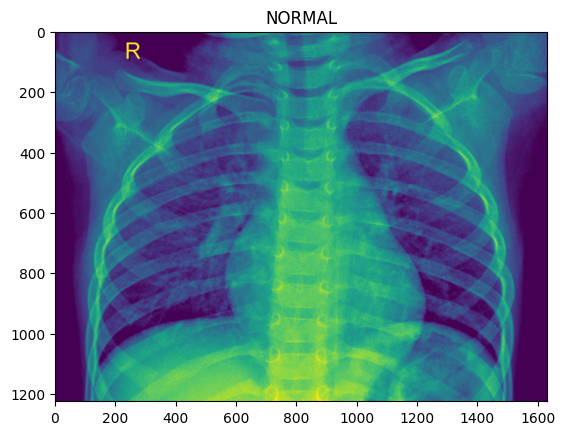

In [70]:
img = mpimg.imread(filepath)
imgplot = plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

In [73]:
# Importing necessary libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

# set the path for the test data
test_dir = "/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/test"

# define categories
CATEGORIES = ['NORMAL', 'PNEUMONIA']

# set image size
img_size = 100

# load the save model
model = load_model('/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/model.keras')

# initialize lists for storing test data
X_test = []
y_test = []

# loop through the test data directory and extract the image and their labels
for category in CATEGORIES:
  path = os.path.join(test_dir, category)
  class_num = CATEGORIES.index(category)
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (img_size, img_size))
      X_test.append(new_array)
      y_test.append(class_num)
    except Exception as e:
      pass

# convert test data to numpy arrays
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# normalize test data
X_test = X_test.astype('float32')/255.0

# Calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)

# Print test acccuray
print('Test accuracy: ', test_acc)

20/20 - 3s - 136ms/step - accuracy: 0.7596 - loss: 1.3074
Test accuracy:  0.7596153616905212


# Pre-trained Models

In [75]:
# import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define image size
img_size = 100

# load the pre-trained model (VGG16)
base_model = VGG16(input_shape = (img_size, img_size, 3), include_top=False, weights='imagenet')

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
  layer.trainable = False

# add custom layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
predictions = Dense(1, activation = 'sigmoid')(x)

# create a new model
model = Model(inputs = base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

# define the image generators for training and validation data
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range= 0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale = 1./255)

# Specify the training and validation data directories
train_dir = "/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/train"
val_dir = "/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/val"

# create the image generators for training and validation data
train_genrator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_size, img_size),
                                                   batch_size = 32,
                                                   class_mode = 'binary')
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_size, img_size),
                                                batch_size = 32,
                                                class_mode = 'binary')

# Train the model
model.fit(train_genrator, epochs = 10, validation_data=val_generator)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 498ms/step - accuracy: 0.8610 - loss: 0.2865 - val_accuracy: 0.9375 - val_loss: 0.2341
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 542ms/step - accuracy: 0.9337 - loss: 0.1712 - val_accuracy: 0.7500 - val_loss: 0.4115
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 617ms/step - accuracy: 0.9385 - loss: 0.1569 - val_accuracy: 0.7500 - val_loss: 0.4325
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 507ms/step - accuracy: 0.9402 - loss: 0.1591 - val_accuracy: 0.9375 - val_loss: 0.2203
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 525ms/step - accuracy: 0.9529 - loss: 0.1230 - val_accuracy: 0.9375 - val_loss: 0.2263
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 502ms/step - accuracy: 0.9591 - loss: 0.1090 - val_accuracy: 0.7500 - val_loss: 0.3980
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 485ms/step - accuracy: 0.9600 - loss: 0.1158 - val_accuracy: 0.6875 - val_loss: 0.6920
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 78s 476ms/step - accuracy: 0.9568 - loss: 

In [76]:
# Evaluate the model on test data
test_dir = "/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/test"
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_size, img_size),
                                                  batch_size = 32,
                                                  class_mode = 'binary',
                                                  shuffle = False)
test_loss, test_acc= model.evaluate(test_generator)
print('Test accuarcy: ', test_acc)

Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 330ms/step - accuracy: 0.8136 - loss: 0.6529
Test accuarcy:  0.8846153616905212


In [77]:
model.save("/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/custom_pre_trained_model_10.keras")

In [78]:
model.summary()

Model: "functional_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,378,053 (70.11 MB)

 Trainable params: 1,221,121 (4.66 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,442,244 (9.32 MB)

In [79]:
model = tf.keras.models.load_model("/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/custom_pre_trained_model_10.keras")

In [81]:
# evaluate the model on test data
test_dir = "/content/drive/MyDrive/GEN AI/DL/chest_xray/chest_xray/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 624 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 300ms/step - accuracy: 0.8136 - loss: 0.6529
Test accuracy: 0.8846153616905212
